In [ ]:
#https://www.kaggle.com/andrewmvd/cyberbullying-classification?select=cyberbullying_tweets.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Imports

In [1]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split

%matplotlib inline

#NLTK package for NLP
!pip install nltk

#import the nltk package
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,sent_tokenize

#Packages for data cleaning
!pip install contractions
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import download as nltk_download
import random
import contractions
import numpy as np
import re

#Modeling 
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
!pip install hyperopt
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn import linear_model, svm, datasets, metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

!pip install catboost
from catboost import CatBoostClassifier

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 284 kB 4.6 MB/s 
     |████████████████████████████████| 106 kB 12.0 MB/s 
     |████████████████████████████████| 76.1 MB 60 kB/s 


In [4]:
#data = pd.read_csv("/content/drive/MyDrive/Ensemble Learning_CyberBullies/cyberbullying_tweets.csv")
#data = pd.read_csv(r"C:\Users\Aashima\T2\Ensemble\Project_CyberBullies\cyberbullying_tweets.csv\cyberbullying_tweets.csv")
data = pd.read_csv('cyberbullying_tweets.csv')
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/cyberbullying_tweets.csv')

In [5]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying


#Feature Engineering

In [6]:
#Number of Characters
data['char_count'] = data.apply(lambda x: len(x['tweet_text']), axis=1)

In [7]:
#Number of words
def word_count(df):
  return(len(df.split()))

data['word_count'] = data.apply(lambda x: word_count(x['tweet_text']), axis=1)

In [8]:
#Number of Capital Characters
def capital_chars(text):
    temp=0
    for i in text:
        if i.isupper():
            temp+=1
    return temp

data['capital_char_count'] = data.apply(lambda x: capital_chars(x['tweet_text']), axis=1)


In [9]:
##Number of capital words

def count_capital_words(text):
    return sum(map(str.isupper,text.split()))

data['capital_word_count'] = data.apply(lambda x: count_capital_words(x['tweet_text']), axis=1)

In [10]:
#Count of punctuations
import string

def count_punctuation(df):
    punctuations= string.punctuation
    dict_=dict()
    for i in punctuations:
        dict_[str(i)+' count']= df.count(i)
    return sum(1 for v in dict_.values() if v != 0)

data['punctuation_count'] = data.apply(lambda x: count_punctuation(x['tweet_text']), axis = 1)

In [11]:
#Number of words in quotes

def count_words_in_quotes(text):
  x = re.findall("'.'",text)
  count=0
  if x is None: return 0
  else:
      for i in x:
          t=i[1:-1]
          count+= word_count(t)
      return count


data['count_words_in_quotes'] = data.apply(lambda x: count_words_in_quotes(x['tweet_text']), axis = 1)

In [12]:
#Number of sentences
#Not the best logic for counting the sentences, can be improved

data['Number_of_sentences'] = data.apply(lambda x: (x['tweet_text'].count(". ")+1), axis =1)

In [13]:
#Count of unique words
def count_unique_words(text):
    return len(set(text.split()))

data['Unique_words'] = data.apply(lambda x: count_unique_words(x['tweet_text']), axis = 1)


In [14]:
#Count of Hashtags
from collections import Counter
import re

def hashtag(df):
  lst = [df]
  hash_counts = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(lst), re.I))
  return sum(hash_counts.values())

data['Hashtags'] = data.apply(lambda x: hashtag(x['tweet_text']), axis = 1)


In [15]:
#Count of mentions
def count_mentions(df):
  lst = [df]
  mention_counts = Counter(re.findall(r'@([a-z0-9]+)', ' '.join(lst), re.I))
  return sum(mention_counts.values())

data['number_of_mentions'] = data.apply(lambda x: count_mentions(x['tweet_text']), axis = 1)

In [16]:
#Count of stop words
import nltk
nltk.download('stopwords')

def stopwords_count(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)


data['Number_of_stopwords'] = data.apply(lambda x: stopwords_count(x['tweet_text']), axis = 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
#Average sentence length, Unique words%age, Stopwords as a percentage of total words

data['avg_sentlength'] = data['word_count']/data['Number_of_sentences']
data['unique_vs_words'] = data['Unique_words']/data['word_count']
data['stopwords_vs_words'] = data['Number_of_stopwords']/data['word_count']

In [ ]:
data.head(20)

,tweet_text,cyberbullying_type,char_count,word_count,capital_char_count,capital_word_count,punctuation_count,count_words_in_quotes,Number_of_sentences,Unique_words,Hashtags,number_of_mentions,Number_of_stopwords,avg_sentlength,unique_vs_words,stopwords_vs_words
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,9,1,0,3,0,1,9,2,0,3,9.0,1.000000,0.333333
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,115,14,12,1,2,0,1,14,10,0,2,14.0,1.000000,0.142857
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,9,3,0,2,0,1,9,0,1,2,9.0,1.000000,0.222222
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,103,18,3,1,5,0,2,18,0,1,8,9.0,1.000000,0.444444
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,103,18,10,1,3,0,2,17,0,1,8,9.0,0.944444,0.444444
5,"@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.",not_cyberbullying,131,23,3,0,3,0,1,20,0,2,10,23.0,0.869565,0.434783
6,Itu sekolah ya bukan tempat bully! Ga jauh kaya neraka,not_cyberbullying,54,10,2,0,1,0,1,10,0,0,0,10.0,1.000000,0.000000
7,Karma. I hope it bites Kat on the butt. She is just nasty. #mkr,not_cyberbullying,63,14,4,1,2,0,4,14,1,0,5,3.5,1.000000,0.357143
8,@stockputout everything but mostly my priest,not_cyberbullying,44,6,0,0,1,0,1,6,0,1,2,6.0,1.000000,0.333333
9,Rebecca Black Drops Out of School Due to Bullying:,not_cyberbullying,50,9,7,0,1,0,1,9,0,0,2,9.0,1.000000,0.222222


In [18]:
data.columns

Index(['tweet_text', 'cyberbullying_type', 'char_count', 'word_count',
       'capital_char_count', 'capital_word_count', 'punctuation_count',
       'count_words_in_quotes', 'Number_of_sentences', 'Unique_words',
       'Hashtags', 'number_of_mentions', 'Number_of_stopwords',
       'avg_sentlength', 'unique_vs_words', 'stopwords_vs_words'],
      dtype='object')

In [19]:
#Drop duplicates
data = data.drop_duplicates(subset=['tweet_text'])

#Text Cleaning

In [20]:
#ADJUSTING DATA

#Putting all tweets in a lower case format
data['tweet_text_clean'] = data['tweet_text'].str.lower()

#Removing numbers and punctuations
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: re.sub(r'[!@#$(),\n"%^*?:;~`0-9]', ' ', x))
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: re.sub(r'[[]]', ' ', x))


In [21]:
# downloading stopwords list
nltk_download('stopwords')
stop = stopwords.words('english')

#Removing the contractions
data['tweet_clean_stopword_removed'] = data['tweet_text_clean'].apply(lambda x: contractions.fix(x))

#Replacing stop words
pat = r'\b(?:{})\b'.format('|'.join(stop))
data['tweet_clean_stopword_removed'] = data['tweet_clean_stopword_removed'].str.replace(pat, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#Lemmatize the sentence

def lemmatizeSentence(sentence):
    lemmatizer = WordNetLemmatizer()
    token_words=word_tokenize(sentence) 
#we need to tokenize the sentence or else lemmatizing will return the entire sentence as is.
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word,pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

In [23]:
data['tweet_clean_stopword_removed'] = data['tweet_clean_stopword_removed'].apply(lambda x: lemmatizeSentence(x))

In [24]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stemming(sentence):
  ps = PorterStemmer()
  token_words = word_tokenize(sentence)
  stem_sentence=[]
    
  for word in token_words:
    stem_sentence.append(ps.stem(word))
    stem_sentence.append(" ")
  
  return "".join(stem_sentence)

In [25]:
data['tweet_clean_stopword_removed_Stemmed'] = data['tweet_clean_stopword_removed'].apply(lambda x: stemming(x))

Creating a target variable for Harful vs Non-harmful Tweets.
0 corresponds to Not_Cyberbullying and 1 Corresponds to Cyberbullying.

In [26]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [27]:
mapping = {'not_cyberbullying':0, 'gender':1, 'religion':1, 'other_cyberbullying':1,
       'age':1, 'ethnicity':1}

In [28]:
data['target'] = data['cyberbullying_type'].map(mapping)

In [ ]:
data.head()

,tweet_text,cyberbullying_type,char_count,word_count,capital_char_count,capital_word_count,punctuation_count,count_words_in_quotes,Number_of_sentences,Unique_words,Hashtags,number_of_mentions,Number_of_stopwords,avg_sentlength,unique_vs_words,stopwords_vs_words,tweet_text_clean,tweet_clean_stopword_removed,tweet_clean_stopword_removed_Stemmed,target
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,9,1,0,3,0,1,9,2,0,3,9.0,1.000000,0.333333,in other words katandandre your food was crapilicious mkr,word katandandre food crapilicious mkr,word katandandr food crapilici mkr,0
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,115,14,12,1,2,0,1,14,10,0,2,14.0,1.000000,0.142857,why is aussietv so white mkr theblock imacelebrityau today sunrise studio neighbours wonderlandten etc,aussietv white mkr theblock imacelebrityau today sunrise studio neighbour wonderlandten etc,aussietv white mkr theblock imacelebrityau today sunris studio neighbour wonderlandten etc,0
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,9,3,0,2,0,1,9,0,1,2,9.0,1.000000,0.222222,xochitlsuckkks a classy whore or more red velvet cupcakes,xochitlsuckkks classy whore red velvet cupcakes,xochitlsuckkk classi whore red velvet cupcak,0
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,103,18,3,1,5,0,2,18,0,1,8,9.0,1.000000,0.444444,jason_gio meh. p thanks for the heads up but not too concerned about another angry dude on twitter.,jason_gio meh . p thank head concern another angry dude twitter .,jason_gio meh . p thank head concern anoth angri dude twitter .,0
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,103,18,10,1,3,0,2,17,0,1,8,9.0,0.944444,0.444444,rudhoeenglish this is an isis account pretending to be a kurdish account. like islam it is all lies.,rudhoeenglish isis account pretend kurdish account . like islam lie .,rudhoeenglish isi account pretend kurdish account . like islam lie .,0


#Data Exploration and visualisation

Exploring words and patterns associated with each type of cyberbullying.

In [ ]:
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return ("hsl(211, 91%, 57%)")


def word_cloud(data, Name,Target):
  from wordcloud import WordCloud
  plt.figure(figsize=(18,9))
  temp1 = data[data['target']== Target]
  text = temp1.tweet_text_clean.values
  cloud=WordCloud(collocations=False,width=1000,height=500,background_color = 'white').generate(" ".join(text))
  plt.axis('off')
  plt.title(Name,fontsize=30)
  return(plt.imshow(cloud.recolor(color_func= blue_color_func, random_state=3),interpolation='bilInear'))

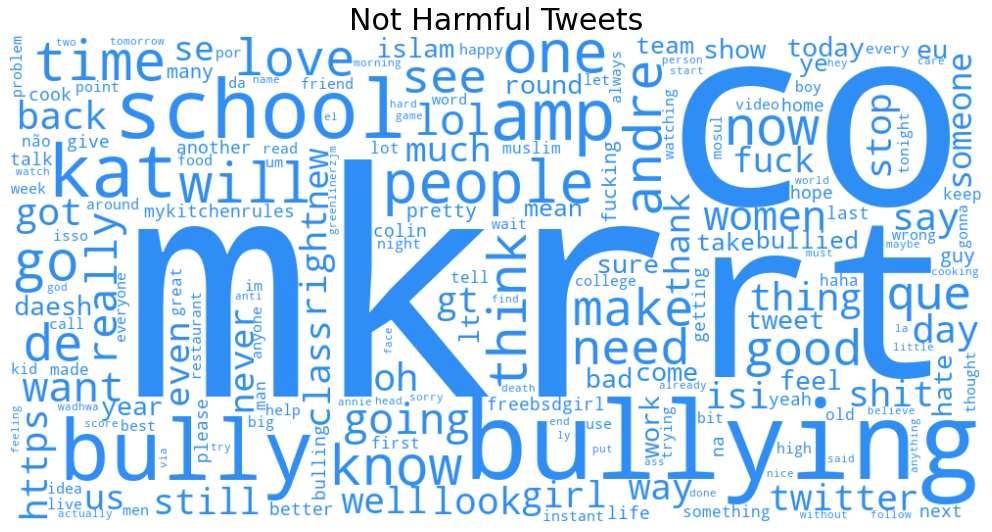

In [ ]:
word_cloud(data,'Not Harmful Tweets',0)

In [ ]:
#Bigrams - can be a good feature in model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_gram(corpus,ngram_range,n=None):
    vector = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    words = vector.transform(corpus)
    freq_words = words.sum(axis=0) 
    words_freq = [(word, freq_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

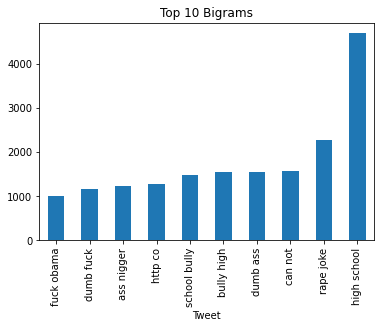

In [ ]:
text_no_harm = data[data['target']== 0].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_no_harm,(2,2),10)

gender2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
gender2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

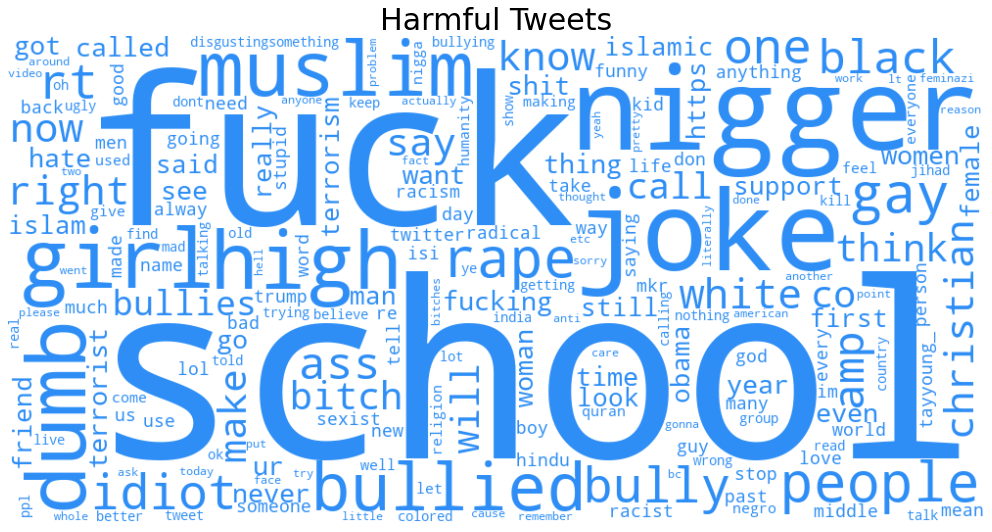

In [ ]:
#EDA for Harmful Tweets
word_cloud(data,'Harmful Tweets',1)

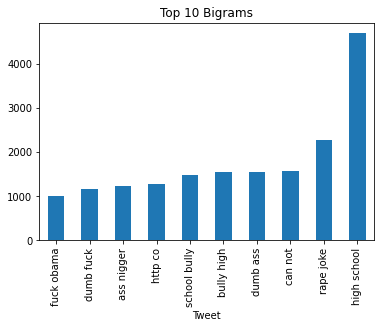

In [ ]:
text_harm= data[data['target']==1].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_harm,(2,2),10)

religion2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
religion2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

#Feature Extraction and Modelling
Different techniques used here like Bag of words and Word2vec. 

## Bag-of-Words

### 1. CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(lowercase=True)
count_vectorizer.fit(data.tweet_clean_stopword_removed_Stemmed)

CountVectorizer()

In [ ]:
X = count_vectorizer.transform(data.tweet_clean_stopword_removed_Stemmed)

In [ ]:
import scipy.sparse
from scipy.sparse import csr_matrix

In [ ]:
X = scipy.sparse.hstack((X,np.array(data["char_count"],data["word_count"])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['capital_char_count'],data['capital_word_count'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['count_words_in_quotes'],data['Number_of_sentences'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['Unique_words'],data['Hashtags'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['number_of_mentions'],data['Number_of_stopwords'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['avg_sentlength'],data['unique_vs_words'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['stopwords_vs_words'])[:,None]))


In [ ]:
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train.shape} and their label's shape {y_train.shape}")
print(f"X test data has shape {X_test.shape} and their label's shape {y_test.shape}")

X train data has shape (36813, 49613) and their label's shape (36813,)
X test data has shape (9204, 49613) and their label's shape (9204,)


#### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=555)

In [ ]:
# with clean text with count_vectorizer - Removed stopwords and stemming and lemmatisation too

y_pred = rf.predict(X_test)
print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))


F1_score : 0.878205


In [ ]:
#Clean Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(y_test, y_pred, target_names=(['Not_Harmful_Tweets','Harmful_Tweets'])))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.81      0.38      0.52      1583
    Harmful_Tweets       0.88      0.98      0.93      7621

          accuracy                           0.88      9204
         macro avg       0.85      0.68      0.73      9204
      weighted avg       0.87      0.88      0.86      9204



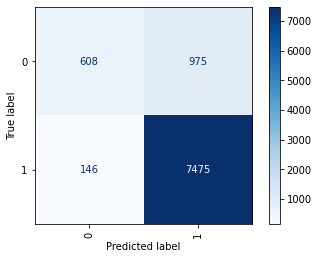

In [ ]:
#Clean Text
plot_confusion_matrix(estimator=rf, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer_clean = CountVectorizer(lowercase=True)
count_vectorizer_clean.fit(data.tweet_clean_stopword_removed_Stemmed)

CountVectorizer()

In [ ]:
X_clean_CV = count_vectorizer_clean.transform(data.tweet_clean_stopword_removed_Stemmed)
y_clean_CV = data.target
X_clean_train_CV, X_clean_test_CV, y_clean_train_CV, y_clean_test_CV = train_test_split(X_clean_CV, y_clean_CV, test_size=.2, random_state=555)

print(f"X train data has shape {X_clean_train_CV.shape} and their label's shape {y_clean_train_CV.shape}")
print(f"X test data has shape {X_clean_test_CV.shape} and their label's shape {y_clean_test_CV.shape}")

X train data has shape (36813, 49606) and their label's shape (36813,)
X test data has shape (9204, 49606) and their label's shape (9204,)


In [ ]:
import scipy.sparse
from scipy.sparse import csr_matrix

In [ ]:
X_clean_CV_fearure = count_vectorizer_clean.transform(data.tweet_text_clean)
#X = count_vectorizer.transform(data.tweet_clean_stopword_removed_Stemmed)

import scipy.sparse
from scipy.sparse import csr_matrix

X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV,np.array(data["char_count"],data["word_count"])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['capital_char_count'],data['capital_word_count'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['count_words_in_quotes'],data['Number_of_sentences'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['Unique_words'],data['Hashtags'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['number_of_mentions'],data['Number_of_stopwords'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['avg_sentlength'],data['unique_vs_words'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['stopwords_vs_words'])[:,None]))

In [ ]:
X_clean_train_CV_feature, X_clean_test_CV_feature, y_clean_train_CV_feature, y_clean_test_CV_feature = train_test_split(X_clean_CV_fearure, y_clean_CV, test_size=.2, random_state=555)

print(f"X train data has shape {X_clean_train_CV_feature.shape} and their label's shape {y_clean_train_CV_feature.shape}")
print(f"X test data has shape {X_clean_test_CV_feature.shape} and their label's shape {y_clean_test_CV_feature.shape}")

X train data has shape (36813, 49613) and their label's shape (36813,)
X test data has shape (9204, 49613) and their label's shape (9204,)


In [ ]:
import pickle
def train_CV(model_n, model, X_train_data, y_train_data, X_test_data, y_test_data):

  model.fit(X_train_data,y_train_data)
  y_pred = model.predict(X_test_data)
  f1 = f1_score(y_pred, y_test_data, average = 'micro')
  print(model_n)
  print('F1_score ((Using CountVectonizer of words technique)) : %f' %(f1))
  print('Accuracy_score of ((Using Bag of words technique)) : %f'  %(accuracy_score(y_test_data, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test_data, y_pred, target_names=(['Not_Harmful_Tweets','Harmful_Tweets'])))
  plot_confusion_matrix(estimator=model, X= X_test_data, y_true=y_test_data, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models_binary/" + model_n +".pkl",'wb'))

#### Decision Trees

DecisionTree
F1_score ((Using CountVectonizer of words technique)) : 0.869079
Accuracy_score of ((Using Bag of words technique)) : 0.869079

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.63      0.57      0.60      1583
    Harmful_Tweets       0.91      0.93      0.92      7621

          accuracy                           0.87      9204
         macro avg       0.77      0.75      0.76      9204
      weighted avg       0.86      0.87      0.87      9204



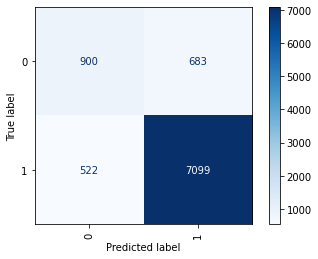

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_CV("DecisionTree", dt, X_clean_train_CV_feature, y_clean_train_CV_feature, X_clean_test_CV_feature, y_clean_test_CV_feature)

#### Gradient Boosting


GradientBoosting_CV
F1_score ((Using CountVectonizer of words technique)) : 0.863429
Accuracy_score of ((Using Bag of words technique)) : 0.863429

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.76      0.30      0.43      1583
    Harmful_Tweets       0.87      0.98      0.92      7621

          accuracy                           0.86      9204
         macro avg       0.81      0.64      0.68      9204
      weighted avg       0.85      0.86      0.84      9204



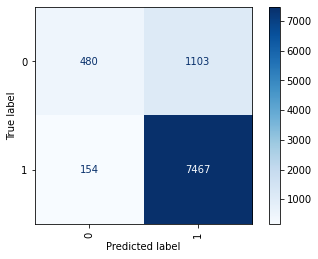

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)


train_CV("GradientBoosting_CV", gb, X_clean_train_CV_feature, y_clean_train_CV_feature, X_clean_test_CV_feature, y_clean_test_CV_feature)

#### Light GBM

In [ ]:
X_clean_train_CV_LGBM =X_clean_train_CV_feature.astype('float32')
#y_train_CV_LGBM = y_train_CV.astype('float32')
X_clean_test_CV_LGBM = X_clean_test_CV_feature.astype('float32')
#y_test_CV_LGBM = y_test_CV.astype('float32')

LightGBM
F1_score ((Using CountVectonizer of words technique)) : 0.884181
Accuracy_score of ((Using Bag of words technique)) : 0.884181

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.74      0.50      0.60      1583
    Harmful_Tweets       0.90      0.96      0.93      7621

          accuracy                           0.88      9204
         macro avg       0.82      0.73      0.77      9204
      weighted avg       0.88      0.88      0.87      9204



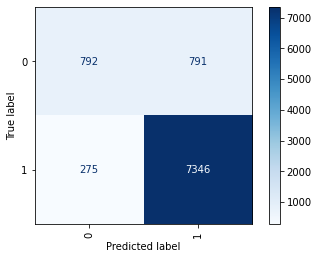

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_CV("LightGBM", lgb, X_clean_train_CV_LGBM, y_clean_train_CV, X_clean_test_CV_LGBM, y_clean_test_CV)

#### XGBoost

In [ ]:
model = XGBClassifier(objective = 'binary:logistic')

# fit the model on the whole dataset
xgboost_model = model.fit(X_train, y_train)

#Predict
y_pred = xgboost_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of XGBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of XGBoost((Using Bag of words technique)) : 0.858105
Accuracy_score of XGBoost((Using Bag of words technique)) : 0.858105


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.73      0.28      0.40      1583
    Harmful_Tweets       0.87      0.98      0.92      7621

          accuracy                           0.86      9204
         macro avg       0.80      0.63      0.66      9204
      weighted avg       0.84      0.86      0.83      9204



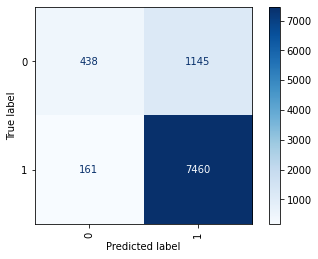

In [ ]:
plot_confusion_matrix(estimator=xgboost_model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

#### Adaboost

In [ ]:
#Clean text
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=0.1)
adaboost_model = model.fit(X_train, y_train)

#Predict
y_pred = adaboost_model.predict(X_test)

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of AdaBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of AdaBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of AdaBoost((Using Bag of words technique)) : 0.840830
Accuracy_score of AdaBoost((Using Bag of words technique)) : 0.840830


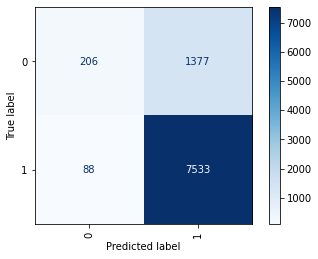

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=adaboost_model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
#Clean Text
print(classification_report(y_test, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.70      0.13      0.22      1583
    Harmful_Tweets       0.85      0.99      0.91      7621

          accuracy                           0.84      9204
         macro avg       0.77      0.56      0.57      9204
      weighted avg       0.82      0.84      0.79      9204



#### CatBoost

In [ ]:
#Catboost
!pip install catboost
from catboost import CatBoostClassifier

model = CatBoostClassifier()
catboost_model = model.fit(X_train, y_train)

#Predict
y_pred = catboost_model.predict(X_test)

Learning rate set to 0.048041
0:	learn: 0.6220158	total: 247ms	remaining: 4m 6s
1:	learn: 0.5691392	total: 422ms	remaining: 3m 30s
2:	learn: 0.5471744	total: 595ms	remaining: 3m 17s
3:	learn: 0.5245646	total: 764ms	remaining: 3m 10s
4:	learn: 0.5028852	total: 943ms	remaining: 3m 7s
5:	learn: 0.4896111	total: 1.12s	remaining: 3m 6s
6:	learn: 0.4778199	total: 1.29s	remaining: 3m 3s
7:	learn: 0.4632646	total: 1.47s	remaining: 3m 1s
8:	learn: 0.4379318	total: 1.64s	remaining: 3m 1s
9:	learn: 0.4297257	total: 1.82s	remaining: 2m 59s
10:	learn: 0.4180526	total: 1.99s	remaining: 2m 59s
11:	learn: 0.4107823	total: 2.17s	remaining: 2m 58s
12:	learn: 0.4012745	total: 2.34s	remaining: 2m 57s
13:	learn: 0.3953097	total: 2.51s	remaining: 2m 56s
14:	learn: 0.3834869	total: 2.69s	remaining: 2m 56s
15:	learn: 0.3692603	total: 2.86s	remaining: 2m 55s
16:	learn: 0.3615732	total: 3.05s	remaining: 2m 56s
17:	learn: 0.3549128	total: 3.23s	remaining: 2m 56s
18:	learn: 0.3460764	total: 3.4s	remaining: 2m 55s

In [ ]:
#Clean Text

print('F1_score of CatBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of CatBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of CatBoost((Using Bag of words technique)) : 0.882986
Accuracy_score of CatBoost((Using Bag of words technique)) : 0.882986


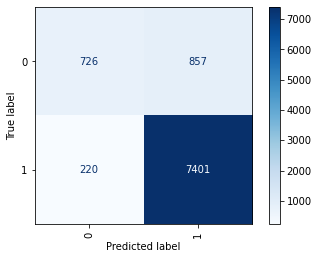

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.77      0.46      0.57      1583
    Harmful_Tweets       0.90      0.97      0.93      7621

          accuracy                           0.88      9204
         macro avg       0.83      0.71      0.75      9204
      weighted avg       0.87      0.88      0.87      9204



### 2. TF-IDF

In [40]:
import sklearn.feature_extraction.text

In [41]:
tfidf = sklearn.feature_extraction.text.TfidfVectorizer(tokenizer=word_tokenize, min_df=.0005, max_df=.8)

In [45]:
# with original text
X_tfidf = tfidf.fit_transform(data.tweet_clean_stopword_removed_Stemmed).toarray()
y_tfidf = data.target.values

In [46]:
X_tfidf = pd.DataFrame(X_tfidf)

In [47]:
#Adding New Features
X_tfidf['char_count']= data[["char_count"]]
X_tfidf['word_count']= data[["word_count"]]
X_tfidf['capital_char_count']= data[["capital_char_count"]]
X_tfidf['capital_word_count']= data[["capital_word_count"]]
X_tfidf['count_words_in_quotes']= data[["count_words_in_quotes"]]
X_tfidf['Number_of_sentences']= data[["Number_of_sentences"]]
X_tfidf['Unique_words']= data[["Unique_words"]]
X_tfidf['Hashtags']= data[["Hashtags"]]
X_tfidf['number_of_mentions']= data[["number_of_mentions"]]
X_tfidf['Number_of_stopwords']= data[["Number_of_stopwords"]]
X_tfidf['unique_vs_words']= data[["unique_vs_words"]]
X_tfidf['stopwords_vs_words']= data[["stopwords_vs_words"]]


In [48]:
X_tfidf = X_tfidf.fillna(0)

In [49]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_tfidf, y_tfidf, test_size=.2, random_state=555)

print(f"X train data has shape {X_train_2.shape} and their label's shape {y_train_2.shape}")
print(f"X test data has shape {X_test_2.shape} and their label's shape {y_test_2.shape}")

X train data has shape (36813, 2610) and their label's shape (36813,)
X test data has shape (9204, 2610) and their label's shape (9204,)


####Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train_2, y_train_2)

RandomForestClassifier(random_state=555)

In [ ]:
y_pred = rf.predict(X_test_2)
print('F1_score : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))

F1_score : 0.895806


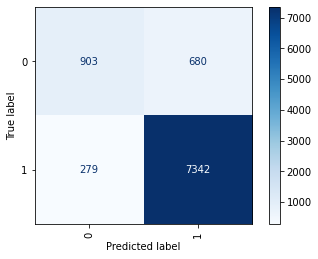

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.76      0.57      0.65      1583
    Harmful_Tweets       0.92      0.96      0.94      7621

          accuracy                           0.90      9204
         macro avg       0.84      0.77      0.80      9204
      weighted avg       0.89      0.90      0.89      9204



In [ ]:
def train_TF(model_n, model, X_train_data, y_train_data, X_test_data, y_test_data):

  model.fit(X_train_data,y_train_data)
  y_pred = model.predict(X_test_data)
  f1 = f1_score(y_pred, y_test_data, average = 'micro')
  print(model_n)
  print('F1_score ((Using TF-IDF technique)) : %f' %(f1))
  print('Accuracy_score of ((Using TF-IDF technique)) : %f'  %(accuracy_score(y_test_data, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test_data, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))
  plot_confusion_matrix(estimator=model, X= X_test_data, y_true=y_test_data, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models_binary/" + model_n +".pkl",'wb'))
 

####Decision Tree

DecisionTree_TF
F1_score ((Using TF-IDF technique)) : 0.869079
Accuracy_score of ((Using TF-IDF technique)) : 0.869079

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.62      0.63      0.62      1583
    Harmful_Tweets       0.92      0.92      0.92      7621

          accuracy                           0.87      9204
         macro avg       0.77      0.77      0.77      9204
      weighted avg       0.87      0.87      0.87      9204



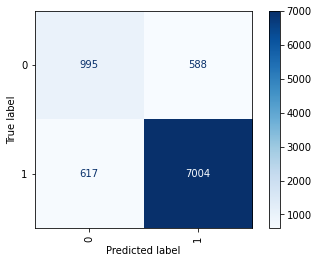

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_TF("DecisionTree_TF", dt, X_train_2, y_train_2, X_test_2, y_test_2)

####GradientBoosting

GradientBoosting_TF
F1_score ((Using TF-IDF technique)) : 0.872773
Accuracy_score of ((Using TF-IDF technique)) : 0.872773

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.76      0.38      0.51      1583
    Harmful_Tweets       0.88      0.97      0.93      7621

          accuracy                           0.87      9204
         macro avg       0.82      0.68      0.72      9204
      weighted avg       0.86      0.87      0.86      9204



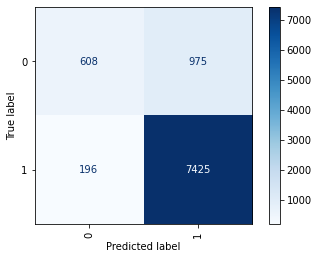

In [ ]:
gb = GradientBoostingClassifier(random_state=42)


train_TF("GradientBoosting_TF", gb, X_train_2, y_train_2, X_test_2, y_test_2)

####LightGBM

In [ ]:
X_clean_train_TF_LGBM =X_train_2.astype('float32')
X_clean_test_TF_LGBM = X_test_2.astype('float32')


LightGBM
F1_score ((Using TF-IDF technique)) : 0.897110
Accuracy_score of ((Using TF-IDF technique)) : 0.897110

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.70      0.69      0.70      1583
    Harmful_Tweets       0.94      0.94      0.94      7621

          accuracy                           0.90      9204
         macro avg       0.82      0.82      0.82      9204
      weighted avg       0.90      0.90      0.90      9204



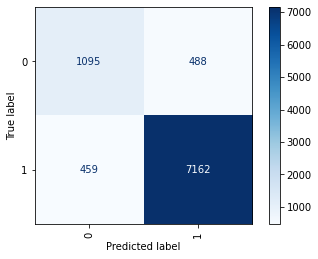

In [ ]:
#from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_TF("LightGBM", lgb, X_clean_train_TF_LGBM, y_train_2, X_clean_test_TF_LGBM, y_test_2)

#### XGBoost

In [ ]:
model = XGBClassifier(objective = 'binary:logistic')

xgboost_model = model.fit(X_train_2, y_train_2)

#Predict
y_pred = xgboost_model.predict(X_test_2)

In [ ]:
print('F1_score of XGBoost((Using TF-IDF)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))

F1_score of XGBoost((Using TF-IDF)) : 0.870708


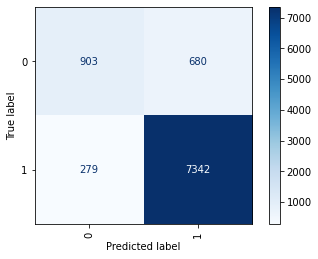

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.74      0.38      0.50      1583
    Harmful_Tweets       0.88      0.97      0.93      7621

          accuracy                           0.87      9204
         macro avg       0.81      0.68      0.71      9204
      weighted avg       0.86      0.87      0.85      9204



#### Adaboost

In [ ]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=1)
adaboost_model = model.fit(X_train_2, y_train_2)

#Predict
y_pred = adaboost_model.predict(X_test_2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of AdaBoost((Using TF-IDF)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))
print('Accuracy_score of AdaBoost((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, y_pred)))

F1_score of AdaBoost((Using TF-IDF)) : 0.874620
Accuracy_score of AdaBoost((Using TF-IDF)) : 0.874620


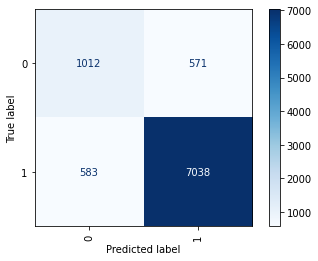

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=adaboost_model, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.63      0.64      0.64      1583
    Harmful_Tweets       0.92      0.92      0.92      7621

          accuracy                           0.87      9204
         macro avg       0.78      0.78      0.78      9204
      weighted avg       0.87      0.87      0.87      9204



####Catboost

In [ ]:
model = CatBoostClassifier()
catboost_model = model.fit(X_train_2, y_train_2)

#Predict
y_pred = catboost_model.predict(X_test_2)

Learning rate set to 0.048041
0:	learn: 0.6346335	total: 367ms	remaining: 6m 6s
1:	learn: 0.5922737	total: 648ms	remaining: 5m 23s
2:	learn: 0.5575789	total: 914ms	remaining: 5m 3s
3:	learn: 0.5185416	total: 1.18s	remaining: 4m 53s
4:	learn: 0.4996427	total: 1.46s	remaining: 4m 49s
5:	learn: 0.4743318	total: 1.74s	remaining: 4m 47s
6:	learn: 0.4584453	total: 2s	remaining: 4m 43s
7:	learn: 0.4379392	total: 2.27s	remaining: 4m 41s
8:	learn: 0.4213331	total: 2.61s	remaining: 4m 47s
9:	learn: 0.4069456	total: 2.9s	remaining: 4m 46s
10:	learn: 0.3970063	total: 3.17s	remaining: 4m 44s
11:	learn: 0.3849906	total: 3.43s	remaining: 4m 42s
12:	learn: 0.3702416	total: 3.71s	remaining: 4m 41s
13:	learn: 0.3625014	total: 3.97s	remaining: 4m 39s
14:	learn: 0.3556321	total: 4.24s	remaining: 4m 38s
15:	learn: 0.3473490	total: 4.51s	remaining: 4m 37s
16:	learn: 0.3429444	total: 4.78s	remaining: 4m 36s
17:	learn: 0.3355570	total: 5.05s	remaining: 4m 35s
18:	learn: 0.3315104	total: 5.32s	remaining: 4m 34

In [ ]:
print('F1_score of CatBoost((Using TF-IDF)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))
print('Accuracy_score of CatBoost((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, y_pred)))

F1_score of CatBoost((Using TF-IDF)) : 0.899826
Accuracy_score of CatBoost((Using TF-IDF)) : 0.899826


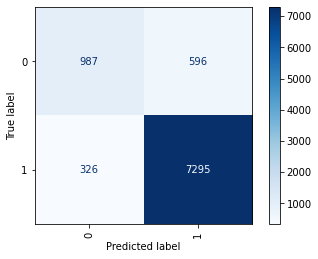

In [ ]:
plot_confusion_matrix(estimator=catboost_model, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.75      0.62      0.68      1583
    Harmful_Tweets       0.92      0.96      0.94      7621

          accuracy                           0.90      9204
         macro avg       0.84      0.79      0.81      9204
      weighted avg       0.89      0.90      0.90      9204



## Word2Vec

In [ ]:
pip install gensim==4.0.0

     |████████████████████████████████| 23.9 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# https://www.kaggle.com/ananyabioinfo/text-classification-using-word2vec

###CBOW

In [ ]:
from gensim.models import TfidfModel
import gensim

In [ ]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [ ]:
# downloading stopwords list
nltk_download('stopwords')
stop = stopwords.words('english')

#ADJUSTING DATA FORMAT

#Putting all tweets in a lower case format
data['tweet_token'] = data['tweet_text'].str.lower()

#Removing numbers and punctuations
data['tweet_token'] = data['tweet_token'].apply(lambda x: re.sub(r'[!$(),\n“%^*?:;.&~"`0-9]', '', x))
data['tweet_token'] = data['tweet_token'].apply(lambda x: re.sub(r'[[]]', '', x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweet_token = []
for i, sent in enumerate(data.tweet_token):
    token = tweet_tokenizer.tokenize(sent)
    token = [word for word in token if word not in stop]
    data["tweet_token"].iloc[i] = token
    tweet_token.append(token)

In [ ]:
data

,tweet_text,cyberbullying_type,char_count,word_count,capital_char_count,capital_word_count,punctuation_count,count_words_in_quotes,Number_of_sentences,Unique_words,...,number_of_mentions,Number_of_stopwords,avg_sentlength,unique_vs_words,stopwords_vs_words,tweet_text_clean,tweet_clean_stopword_removed,tweet_clean_stopword_removed_Stemmed,target,tweet_token
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,61,9,1,0,3,0,1,9,...,0,3,9.0,1.000000,0.333333,in other words katandandre your food was crapilicious mkr,word katandandre food crapilicious mkr,word katandandr food crapilici mkr,0,"[words, #katandandre, food, crapilicious, #mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying,115,14,12,1,2,0,1,14,...,0,2,14.0,1.000000,0.142857,why is aussietv so white mkr theblock imacelebrityau today sunrise studio neighbours wonderlandten etc,aussietv white mkr theblock imacelebrityau today sunrise studio neighbour wonderlandten etc,aussietv white mkr theblock imacelebrityau today sunris studio neighbour wonderlandten etc,0,"[#aussietv, white, #mkr, #theblock, #imacelebrityau, #today, #sunrise, #studio, #neighbours, #wonderlandten, #etc]"
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,60,9,3,0,2,0,1,9,...,1,2,9.0,1.000000,0.222222,xochitlsuckkks a classy whore or more red velvet cupcakes,xochitlsuckkks classy whore red velvet cupcakes,xochitlsuckkk classi whore red velvet cupcak,0,"[@xochitlsuckkks, classy, whore, red, velvet, cupcakes]"
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying,103,18,3,1,5,0,2,18,...,1,8,9.0,1.000000,0.444444,jason_gio meh. p thanks for the heads up but not too concerned about another angry dude on twitter.,jason_gio meh . p thank head concern another angry dude twitter .,jason_gio meh . p thank head concern anoth angri dude twitter .,0,"[@jason_gio, meh, p, thanks, heads, concerned, another, angry, dude, twitter]"
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying,103,18,10,1,3,0,2,17,...,1,8,9.0,0.944444,0.444444,rudhoeenglish this is an isis account pretending to be a kurdish account. like islam it is all lies.,rudhoeenglish isis account pretend kurdish account . like islam lie .,rudhoeenglish isi account pretend kurdish account . like islam lie .,0,"[@rudhoeenglish, isis, account, pretending, kurdish, account, like, islam, lies]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will ...",ethnicity,234,42,3,0,3,0,3,36,...,0,20,14.0,0.857143,0.476190,black ppl aren't expected to do anything depended on for anything. yet free to participate work enjoy the freedom of humans all across this globe. if you waste your energy on the past you will ...,black ppl expect anything depend anything . yet free participate work enjoy freedom humans across globe . waste energy past waste build future .,black ppl expect anyth depend anyth . yet free particip work enjoy freedom human across globe . wast energi past wast build futur .,1,"[black, ppl, expected, anything, depended, anything, yet, free, participate, work, enjoy, freedom, humans, across, globe, waste, energy, past, wasting, building, future]"
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must ...,ethnicity,276,45,4,0,3,0,2,42,...,0,16,22.5,0.933333,0.355556,turner did not withhold his disappointment. turner called the court an “abominable conclave of negro hating demons” with one excepti

In [ ]:
from gensim.models import Word2Vec, Phrases

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
model_cbow = Word2Vec(sentences = data['tweet_token'], vector_size = 100, min_count = 0, window = 5, workers = 2, sg = 0)

In [ ]:
def vectorize_data(data, vocab: dict) -> list:
    print('Vectorize sentences...', end='\r')
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    print('Vectorize sentences... (done)')
    return vectorized

In [ ]:
X_data = tweet_token
input_length = 100
X_pad = pad_sequences(
    sequences=vectorize_data(X_data, vocab=model_cbow.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [ ]:
X = X_pad
y = data.target

#### Random Forest

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train_3.shape} and their label's shape {y_train_3.shape}")
print(f"X test data has shape {X_test_3.shape} and their label's shape {y_test_3.shape}")

X train data has shape (36813, 100) and their label's shape (36813,)
X test data has shape (9204, 100) and their label's shape (9204,)


In [ ]:
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train_3, y_train_3)

RandomForestClassifier(random_state=555)

In [ ]:
from sklearn.metrics import f1_score
y_pred = rf.predict(X_test_3)
print('F1_score : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))

F1_score : 0.883746


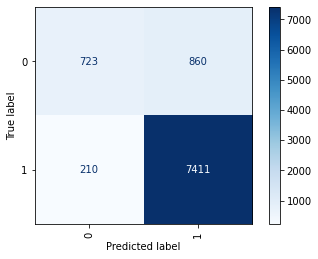

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_3, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.77      0.46      0.57      1583
    Harmful_Tweets       0.90      0.97      0.93      7621

          accuracy                           0.88      9204
         macro avg       0.84      0.71      0.75      9204
      weighted avg       0.88      0.88      0.87      9204



In [ ]:
import pickle
def train_CBOW(model_n, model, X_train_data, y_train_data, X_test_data, y_test_data):

  model.fit(X_train_data,y_train_data)
  y_pred = model.predict(X_test_data)
  f1 = f1_score(y_pred, y_test_data, average = 'micro')
  print(model_n)
  print('F1_score ((Using CBOW technique)) : %f' %(f1))
  print('Accuracy_score of ((Using CBOW technique)) : %f'  %(accuracy_score(y_test_data, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test_data, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))
  plot_confusion_matrix(estimator=model, X= X_test_data, y_true=y_test_data, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models/" + model_n +".pkl",'wb'))
 

####Decision Tree

DecisionTree_CBOW
F1_score ((Using CBOW technique)) : 0.836375
Accuracy_score of ((Using CBOW technique)) : 0.836375

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.52      0.54      0.53      1583
    Harmful_Tweets       0.90      0.90      0.90      7621

          accuracy                           0.84      9204
         macro avg       0.71      0.72      0.72      9204
      weighted avg       0.84      0.84      0.84      9204



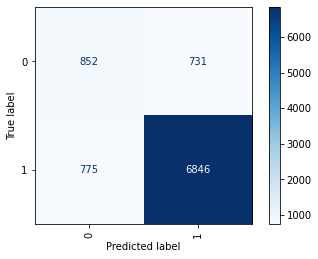

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_CBOW("DecisionTree_CBOW", dt, X_train_3, y_train_3, X_test_3, y_test_3)

####GradientBoosting

GradientBoosting_CBOW
F1_score ((Using CBOW technique)) : 0.877988
Accuracy_score of ((Using CBOW technique)) : 0.877988

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.79      0.40      0.53      1583
    Harmful_Tweets       0.89      0.98      0.93      7621

          accuracy                           0.88      9204
         macro avg       0.84      0.69      0.73      9204
      weighted avg       0.87      0.88      0.86      9204



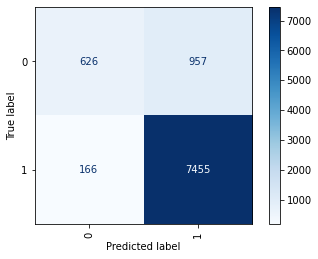

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

train_CBOW("GradientBoosting_CBOW", gb, X_train_3, y_train_3, X_test_3, y_test_3)

####LightGBM

In [ ]:
X_clean_train_CBOW_LGBM =X_train_3.astype('float32')
X_clean_test_CBOW_LGBM = X_test_3.astype('float32')

LightGBM_CBOW
F1_score ((Using CBOW technique)) : 0.898740
Accuracy_score of ((Using CBOW technique)) : 0.898740

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.78      0.58      0.66      1583
    Harmful_Tweets       0.92      0.97      0.94      7621

          accuracy                           0.90      9204
         macro avg       0.85      0.77      0.80      9204
      weighted avg       0.89      0.90      0.89      9204



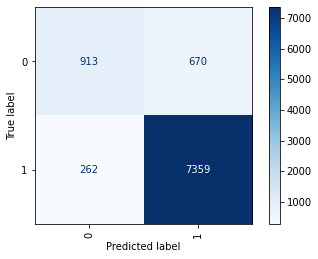

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_CBOW("LightGBM_CBOW", lgb, X_clean_train_CBOW_LGBM, y_train_3, X_clean_test_CBOW_LGBM, y_test_3)

#### XGboost

In [ ]:
model = XGBClassifier(objective = 'binary:logistic')
xgboost_model = model.fit(X_train_3, y_train_3)
y_pred = xgboost_model.predict(X_test_3)

In [ ]:
print('F1_score of XGBoost((Using CBOW)) : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))

F1_score of XGBoost((Using CBOW)) : 0.872229


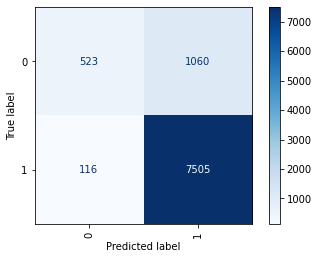

In [ ]:
plot_confusion_matrix(estimator=xgboost_model, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_3, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.82      0.33      0.47      1583
    Harmful_Tweets       0.88      0.98      0.93      7621

          accuracy                           0.87      9204
         macro avg       0.85      0.66      0.70      9204
      weighted avg       0.87      0.87      0.85      9204



#### Adaboost

In [ ]:
model = AdaBoostClassifier(learning_rate=0.1)
adaboost_model = model.fit(X_train_3, y_train_3)

#Predict
y_pred = adaboost_model.predict(X_test_3)

In [ ]:
print('F1_score of AdaBoost((Using CBOW)) : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))
print('Accuracy_score of AdaBoost((Using CBOW)) : %f'  %(accuracy_score(y_test_3, y_pred)))

F1_score of AdaBoost((Using CBOW)) : 0.848327
Accuracy_score of AdaBoost((Using CBOW)) : 0.848327


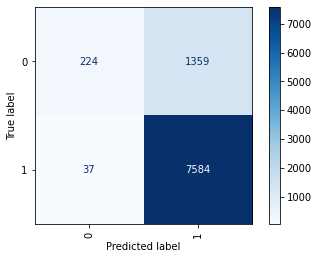

In [ ]:
#Clean_Text

plot_confusion_matrix(estimator=adaboost_model, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_3, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.86      0.14      0.24      1583
    Harmful_Tweets       0.85      1.00      0.92      7621

          accuracy                           0.85      9204
         macro avg       0.85      0.57      0.58      9204
      weighted avg       0.85      0.85      0.80      9204



#### Catboost

In [ ]:
model = CatBoostClassifier()
catboost_model = model.fit(X_train_3, y_train_3)

#Predict
y_pred = catboost_model.predict(X_test_3)

Learning rate set to 0.048041
0:	learn: 0.6468259	total: 35.8ms	remaining: 35.8s
1:	learn: 0.6127572	total: 67.6ms	remaining: 33.7s
2:	learn: 0.5757381	total: 97.7ms	remaining: 32.5s
3:	learn: 0.5511902	total: 127ms	remaining: 31.5s
4:	learn: 0.5292337	total: 156ms	remaining: 31s
5:	learn: 0.5043206	total: 187ms	remaining: 30.9s
6:	learn: 0.4850940	total: 220ms	remaining: 31.3s
7:	learn: 0.4663479	total: 251ms	remaining: 31.1s
8:	learn: 0.4535750	total: 282ms	remaining: 31.1s
9:	learn: 0.4416090	total: 316ms	remaining: 31.3s
10:	learn: 0.4307900	total: 347ms	remaining: 31.2s
11:	learn: 0.4199781	total: 390ms	remaining: 32.1s
12:	learn: 0.4110557	total: 429ms	remaining: 32.5s
13:	learn: 0.4039192	total: 465ms	remaining: 32.7s
14:	learn: 0.3948226	total: 497ms	remaining: 32.6s
15:	learn: 0.3882094	total: 532ms	remaining: 32.7s
16:	learn: 0.3830451	total: 561ms	remaining: 32.4s
17:	learn: 0.3764280	total: 593ms	remaining: 32.4s
18:	learn: 0.3714867	total: 624ms	remaining: 32.2s
19:	learn:

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of CatBoost((Using CBOW)) : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))
print('Accuracy_score of CatBoost((Using CBOW)) : %f'  %(accuracy_score(y_test_3, y_pred)))

F1_score of CatBoost((Using CBOW)) : 0.897653
Accuracy_score of CatBoost((Using CBOW)) : 0.897653


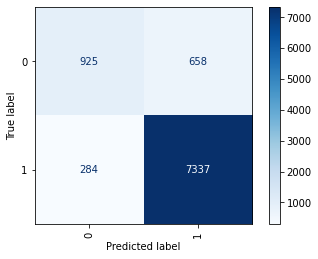

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_3, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.77      0.58      0.66      1583
    Harmful_Tweets       0.92      0.96      0.94      7621

          accuracy                           0.90      9204
         macro avg       0.84      0.77      0.80      9204
      weighted avg       0.89      0.90      0.89      9204



### Skipgram

In [ ]:
from gensim.models import Word2Vec, Phrases

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
model_SG = Word2Vec(sentences = data['tweet_token'], vector_size = 300, min_count = 0, window = 10, workers = 2, sg = 1)

In [ ]:
def vectorize_data(data, vocab: dict) -> list:
    print('Vectorize sentences...', end='\r')
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    print('Vectorize sentences... (done)')
    return vectorized

In [ ]:
X_data = tweet_token
input_length = 300
X_pad_SG = pad_sequences(
    sequences=vectorize_data(X_data, vocab=model_SG.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [ ]:
X = X_pad_SG
y = data.target

In [ ]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train_4.shape} and their label's shape {y_train_4.shape}")
print(f"X test data has shape {X_test_4.shape} and their label's shape {y_test_4.shape}")

X train data has shape (36813, 300) and their label's shape (36813,)
X test data has shape (9204, 300) and their label's shape (9204,)


#### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train_4, y_train_4)

RandomForestClassifier(random_state=555)

In [ ]:
y_pred = rf.predict(X_test_4)
print('F1_score : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))

F1_score : 0.882334


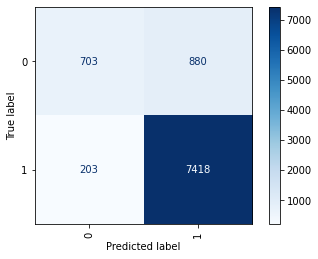

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.78      0.44      0.56      1583
    Harmful_Tweets       0.89      0.97      0.93      7621

          accuracy                           0.88      9204
         macro avg       0.83      0.71      0.75      9204
      weighted avg       0.87      0.88      0.87      9204



In [ ]:
def train_SG(model_n, model, X_train_data, y_train_data, X_test_data, y_test_data):

  model.fit(X_train_data,y_train_data)
  y_pred = model.predict(X_test_data)
  f1 = f1_score(y_pred, y_test_data,average = 'micro')
  print(model_n)
  print('F1_score ((Using SkipGram of words technique)) : %f' %(f1))
  print('Accuracy_score of SG((Using SkipGram technique)) : %f'  %(accuracy_score(y_test_data, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test_data, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))
  plot_confusion_matrix(estimator=model, X= X_test_data, y_true=y_test_data, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models/" + model_n +".pkl",'wb'))
 

####Decision Tree

DecisionTree_SG
F1_score ((Using SkipGram of words technique)) : 0.832464
Accuracy_score of SG((Using SkipGram technique)) : 0.832464

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.51      0.53      0.52      1583
    Harmful_Tweets       0.90      0.89      0.90      7621

          accuracy                           0.83      9204
         macro avg       0.71      0.71      0.71      9204
      weighted avg       0.84      0.83      0.83      9204



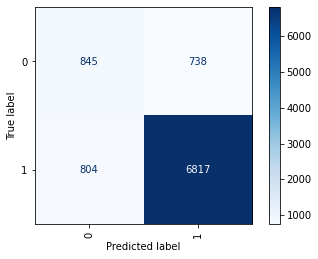

In [ ]:
#from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_SG("DecisionTree_SG", dt, X_train_4, y_train_4, X_test_4, y_test_4)

####GradientBoosting

GradientBoosting_SG
F1_score ((Using SkipGram of words technique)) : 0.879400
Accuracy_score of SG((Using SkipGram technique)) : 0.879400

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.80      0.40      0.53      1583
    Harmful_Tweets       0.89      0.98      0.93      7621

          accuracy                           0.88      9204
         macro avg       0.85      0.69      0.73      9204
      weighted avg       0.87      0.88      0.86      9204



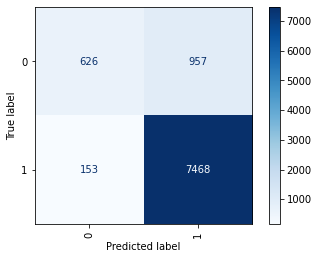

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

train_SG("GradientBoosting_SG", gb, X_train_4, y_train_4, X_test_4, y_test_4)

####LightGBM

In [ ]:
X_clean_train_SG_LGBM =X_train_4.astype('float32')
X_clean_test_SG_LGBM = X_test_4.astype('float32')

LightGBM_SG
F1_score ((Using SkipGram of words technique)) : 0.896132
Accuracy_score of SG((Using SkipGram technique)) : 0.896132

------------------------------------------
                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.77      0.56      0.65      1583
    Harmful_Tweets       0.91      0.97      0.94      7621

          accuracy                           0.90      9204
         macro avg       0.84      0.76      0.79      9204
      weighted avg       0.89      0.90      0.89      9204



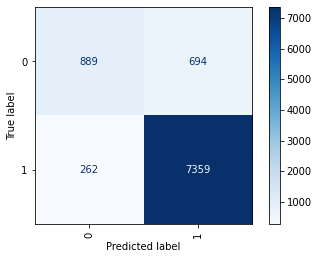

In [ ]:
#from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_SG("LightGBM_SG", lgb, X_clean_train_SG_LGBM, y_train_4, X_clean_test_SG_LGBM, y_test_4)

#### Xgboost

In [ ]:
#Xgboost
model = XGBClassifier(objective = 'binary:logistic')

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model = model.fit(X_train_4, y_train_4)

#Predict
y_pred = xgboost_model.predict(X_test_4)

In [ ]:
print('F1_score of XGBoost((Using Skipgram)) : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))

F1_score of XGBoost((Using Skipgram)) : 0.872447


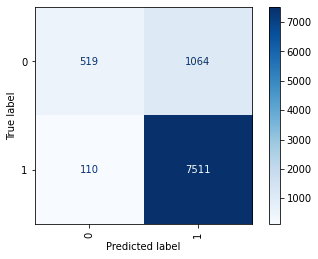

In [ ]:
plot_confusion_matrix(estimator=xgboost_model, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.83      0.33      0.47      1583
    Harmful_Tweets       0.88      0.99      0.93      7621

          accuracy                           0.87      9204
         macro avg       0.85      0.66      0.70      9204
      weighted avg       0.87      0.87      0.85      9204



#### Adaboost

In [ ]:
model = AdaBoostClassifier(learning_rate=1)
adaboost_model = model.fit(X_train_4, y_train_4)

#Predict
y_pred = adaboost_model.predict(X_test_4)

In [ ]:
print('F1_score of AdaBoost((Using Skipgram)) : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))
print('Accuracy_score of AdaBoost((Using Skipgram)) : %f'  %(accuracy_score(y_test_3, y_pred)))

F1_score of AdaBoost((Using Skipgram)) : 0.870817
Accuracy_score of AdaBoost((Using Skipgram)) : 0.870817


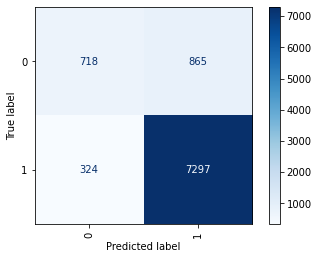

In [ ]:
plot_confusion_matrix(estimator=adaboost_model, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.69      0.45      0.55      1583
    Harmful_Tweets       0.89      0.96      0.92      7621

          accuracy                           0.87      9204
         macro avg       0.79      0.71      0.74      9204
      weighted avg       0.86      0.87      0.86      9204



#### Catboost

In [ ]:
model = CatBoostClassifier()
catboost_model = model.fit(X_train_4, y_train_4)

#Predict
y_pred = catboost_model.predict(X_test_4)

Learning rate set to 0.048041
0:	learn: 0.6450934	total: 56.2ms	remaining: 56.1s
1:	learn: 0.6172032	total: 110ms	remaining: 54.8s
2:	learn: 0.5918849	total: 160ms	remaining: 53.1s
3:	learn: 0.5719974	total: 205ms	remaining: 51s
4:	learn: 0.5511616	total: 254ms	remaining: 50.5s
5:	learn: 0.5324822	total: 305ms	remaining: 50.5s
6:	learn: 0.5123028	total: 366ms	remaining: 51.9s
7:	learn: 0.4979159	total: 435ms	remaining: 54s
8:	learn: 0.4827364	total: 496ms	remaining: 54.6s
9:	learn: 0.4699920	total: 552ms	remaining: 54.6s
10:	learn: 0.4580504	total: 616ms	remaining: 55.3s
11:	learn: 0.4438211	total: 669ms	remaining: 55.1s
12:	learn: 0.4303905	total: 735ms	remaining: 55.8s
13:	learn: 0.4227604	total: 795ms	remaining: 56s
14:	learn: 0.4123401	total: 854ms	remaining: 56.1s
15:	learn: 0.4040436	total: 909ms	remaining: 55.9s
16:	learn: 0.3982661	total: 972ms	remaining: 56.2s
17:	learn: 0.3918244	total: 1.03s	remaining: 56s
18:	learn: 0.3857729	total: 1.08s	remaining: 55.8s
19:	learn: 0.37884

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of CatBoost((Using Skipgram)) : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))
print('Accuracy_score of CatBoost((Using Skipgram)) : %f'  %(accuracy_score(y_test_4, y_pred)))

F1_score of CatBoost((Using Skipgram)) : 0.898088
Accuracy_score of CatBoost((Using Skipgram)) : 0.898088


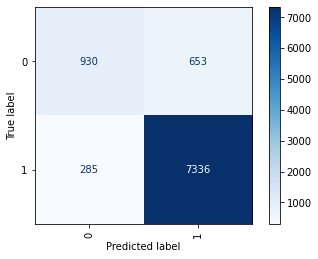

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=['Not_Harmful_Tweets','Harmful_Tweets']))

                    precision    recall  f1-score   support

Not_Harmful_Tweets       0.77      0.59      0.66      1583
    Harmful_Tweets       0.92      0.96      0.94      7621

          accuracy                           0.90      9204
         macro avg       0.84      0.78      0.80      9204
      weighted avg       0.89      0.90      0.89      9204




#Hyperparameter Tuning - incomplete 

## Xgboost


### Bag of words 

In [38]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [50]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train, y_train), (X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    pred= clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]


XGBoostError: ignored

In [ ]:
# define the model
model = XGBClassifier(objective = 'multi:softmax',colsample_bytree= 0.5163471408413387, gamma =3.831493253976012, max_depth = 5, min_child_weight =6, reg_alpha= 123, reg_lambda= 0.5290142286731677)

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model = model.fit(X_train, y_train)

#Predict
y_pred = xgboost_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))
print('Accuracy_score of XGBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of XGBoost((Using Bag of words technique)) : 0.798511
Accuracy_score of XGBoost((Using Bag of words technique)) : 0.798511


### TF-IDF

In [54]:
def objective2(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train_2, y_train_2), (X_test_2, y_test_2)]
    
    clf.fit(X_train_2, y_train_2,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    pred= clf.predict(X_test_2)
    accuracy = accuracy_score(y_test_2,pred)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective2,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 20,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

  0%|          | 0/20 [00:00<?, ?it/s, best loss: ?]

In [ ]:
# define the model
model_2 = XGBClassifier(objective = 'multi:softmax',colsample_bytree= 0.9308781563799851, gamma =1.9365290511369784, max_depth = 5, min_child_weight =7, reg_alpha= 43, reg_lambda= 0.9710120546082042)

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model_2 = model_2.fit(X_train_2, y_train_2)

#Predict
y_pred_2 = xgboost_model_2.predict(X_test_2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using TF-IDF)) : %f' %(f1_score(y_pred_2, y_test_2, average = 'micro')))
print('Accuracy_score of XGBoost((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, y_pred_2)))

F1_score : 0.807212


##CatBoost

### Bag of words

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from scipy.stats import randint

You should consider upgrading via the '/Users/prajwallohan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
model = CatBoostClassifier()
# define the grid of values to search
grid = dict()
grid['learning_rate'] = [0.001, 0.01, 0.1]
grid['max_depth'] = [4,6,8]
grid['iterations'] = [40]
grid['l2_leaf_reg'] = [3,5,10]


# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train,y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
   print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.816061 using {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 8}
0.630918 (0.007302) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.001, 'max_depth': 4}
0.674028 (0.008261) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.001, 'max_depth': 6}
0.716558 (0.008688) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.001, 'max_depth': 8}
0.631452 (0.007282) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'max_depth': 4}
0.694591 (0.007461) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'max_depth': 6}
0.726754 (0.005003) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'max_depth': 8}
0.775704 (0.006094) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 4}
0.803267 (0.005180) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 6}
0.816061 (0.005217) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'm

In [ ]:
# elapsed = end - start
# print("time taken: ", time.strftime("%Hh %Mm %Ss", time.gmtime(elapsed)))

time taken:  08h 26m 09s


In [ ]:
#With Hyperparameters
!pip install catboost
from catboost import CatBoostClassifier
from scipy.stats import randint

model = CatBoostClassifier(iterations= 1000,learning_rate= 0.1,max_depth= 8)
catboost_model = model.fit(X_train, y_train)

#Predict
y_pred = catboost_model.predict(X_test)

0:	learn: 1.5163942	total: 2.6s	remaining: 43m 21s
1:	learn: 1.3585355	total: 5.25s	remaining: 43m 38s
2:	learn: 1.2385730	total: 8.65s	remaining: 47m 53s
3:	learn: 1.1455928	total: 11.3s	remaining: 46m 41s
4:	learn: 1.0691555	total: 13.9s	remaining: 45m 59s
5:	learn: 1.0036025	total: 16.4s	remaining: 45m 14s
6:	learn: 0.9497308	total: 19s	remaining: 44m 52s
7:	learn: 0.9036526	total: 21.6s	remaining: 44m 34s
8:	learn: 0.8607012	total: 24.2s	remaining: 44m 19s
9:	learn: 0.8265945	total: 26.7s	remaining: 44m 5s
10:	learn: 0.7945348	total: 29.3s	remaining: 43m 52s
11:	learn: 0.7679699	total: 31.9s	remaining: 43m 43s
12:	learn: 0.7419789	total: 34.5s	remaining: 43m 35s
13:	learn: 0.7191286	total: 37.1s	remaining: 43m 30s
14:	learn: 0.6993739	total: 39.6s	remaining: 43m 23s
15:	learn: 0.6807919	total: 42.3s	remaining: 43m 23s
16:	learn: 0.6624165	total: 44.9s	remaining: 43m 18s
17:	learn: 0.6485562	total: 47.6s	remaining: 43m 16s
18:	learn: 0.6351201	total: 50.2s	remaining: 43m 10s
19:	lea

In [ ]:
print('F1_score of CatBoost((Using Hyperparameters)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score of CatBoost((Using Hyperparameters)) : 0.859626


### TF-IDF

##Adaboost

### Bag of words

In [ ]:
#Hyper parameter tuning for Bag of words - Adaboost

model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# define the model

model_ad = AdaBoostClassifier(n_estimators=100,learning_rate=0.001)

# make predictions 

# fit the model on the whole dataset
adaboost_model = model_ad.fit(X_train, y_train)

#Predict
y_pred = adaboost_model.predict(X_test)

In [ ]:

print('F1_score of Adaboost((Using Bag of words)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of Adaboost((Using Bag of words)) : %f'  %(accuracy_score(y_test, y_pred)))


##Gradient Boost